#### Checks that the data loaded is valid

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

'''Set parameters'''
torch.manual_seed(1) # set the random seed
use_cuda = True # Use cuda
batch_size = 128
num_workers = 0

# Training and validation dataset
# Options: train, validate, test, overfit
train_folder = 'train'
validate_folder = 'validate'

'''Check GPU'''
print(torch.cuda.get_device_name(torch.cuda.current_device()))

GeForce RTX 2060


#### Visualize some values of images and make sure that values are bounded correctly

torch.Size([1, 3, 48, 48])
tensor(0.9961, dtype=torch.float64)
tensor(0.2706, dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(0.9725, dtype=torch.float64)
tensor(0., dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(0.7804, dtype=torch.float64)
tensor(0.1176, dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(0.9390, dtype=torch.float64)
tensor(0., dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(0.7882, dtype=torch.float64)
tensor(0.0431, dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(0.8471, dtype=torch.float64)
tensor(0.0039, dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(1., dtype=torch.float64)
tensor(0.0353, dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(0.9938, dtype=torch.float64)
tensor(0., dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(1., dtype=torch.float64)
tensor(0.0039, dtype=torch.float64)
torch.Size([1, 3, 48, 48])
tensor(1., dtype=torch.float64)
tensor(0., dtype=torch.float64)


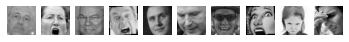

In [2]:
#load tensors
master_path = '../ProcessedData/cutoff10000/'
dataset = torchvision.datasets.DatasetFolder(master_path + train_folder, loader=torch.load, extensions=('.tensor'))

# Prepare Dataloader
train_loader = torch.utils.data.DataLoader(dataset, batch_size=1, num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of imgs
dataiter = iter(train_loader)

# Visualize 5 images
fig = plt.figure()
for i in range(10):
    imgs, labels = dataiter.next()
    print(imgs.shape)
    # Iterate through images of a batch and visualize
    for img in imgs:
        img_np = np.asarray((img.transpose(0,1)).transpose(1,2))
        plt.subplot(1, 10, i+1)    
        plt.imshow(img_np)
        plt.axis('off')
        
        # Check that tensor values are between 0 and 1
        print(torch.max(img))    
        print(torch.min(img))

#### Load images from train and validation sets

In [3]:
train_dataset = torchvision.datasets.DatasetFolder(master_path + train_folder, loader=torch.load, extensions=('.tensor'))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

val_dataset = torchvision.datasets.DatasetFolder(master_path + validate_folder, loader=torch.load, extensions=('.tensor'))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

#### Check an example to see values are valid

In [4]:
# Check training
dataiter = iter(train_loader)
features, labels = dataiter.next()
print(features.shape)
print(labels.shape)
# print(features[0])

# Check validation
dataiter = iter(val_loader)
features, labels = dataiter.next()
print(features.shape)
print(labels.shape)
print(features[0])

torch.Size([128, 3, 48, 48])
torch.Size([128])
torch.Size([128, 3, 48, 48])
torch.Size([128])
tensor([[[0.1608, 0.1333, 0.1451,  ..., 0.8510, 0.8471, 0.8510],
         [0.1647, 0.1373, 0.0824,  ..., 0.8510, 0.8510, 0.8510],
         [0.0667, 0.1059, 0.1686,  ..., 0.8549, 0.8549, 0.8549],
         ...,
         [0.8353, 0.8353, 0.8353,  ..., 0.8314, 0.8353, 0.8275],
         [0.8314, 0.8353, 0.8353,  ..., 0.8039, 0.8275, 0.8510],
         [0.8314, 0.8314, 0.8314,  ..., 0.6275, 0.8431, 0.8078]],

        [[0.1608, 0.1333, 0.1451,  ..., 0.8510, 0.8471, 0.8510],
         [0.1647, 0.1373, 0.0824,  ..., 0.8510, 0.8510, 0.8510],
         [0.0667, 0.1059, 0.1686,  ..., 0.8549, 0.8549, 0.8549],
         ...,
         [0.8353, 0.8353, 0.8353,  ..., 0.8314, 0.8353, 0.8275],
         [0.8314, 0.8353, 0.8353,  ..., 0.8039, 0.8275, 0.8510],
         [0.8314, 0.8314, 0.8314,  ..., 0.6275, 0.8431, 0.8078]],

        [[0.1608, 0.1333, 0.1451,  ..., 0.8510, 0.8471, 0.8510],
         [0.1647, 0.1373, 0.0